In [1]:
%matplotlib inline
import sys
sys.path.append('../')
from src.LRGSG_package.LRGSG import *

In [2]:
N = 100
Navg = 2
p = 0.1
G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()
  0%|          | 0/1000 [00:00<?, ?it/s]/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:48: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:48: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
100%|██████████| 1000/1000 [00:00<00:00, 16529.60it/s]


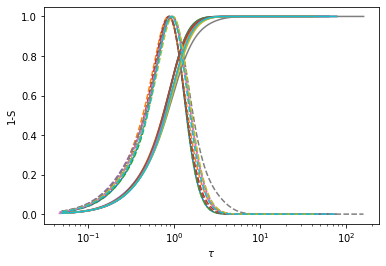

In [3]:
rmax = 10
t1Sm1Avg = []
t1CsAvg = []
for r in [i/rmax for i in range(rmax)]:
    G = nx.erdos_renyi_graph(N, p, seed=None, directed=False)
    labelList = [i for i in range(G.number_of_nodes())]
    for e in G.edges():
        G.add_edge(e[0], e[1], weight=1)
        if np.random.random(1) < 0.01:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label='ER-05')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
             color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1/np.max(dS1)])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')


In [5]:
averaged_Sm1(t1CsAvg)

(array([4.59255338e-02, 4.63020293e-02, 4.66816112e-02, 4.70643050e-02,
        4.74501360e-02, 4.78391301e-02, 4.82313131e-02, 4.86267112e-02,
        4.90253508e-02, 4.94272584e-02, 4.98324609e-02, 5.02409851e-02,
        5.06528585e-02, 5.10681083e-02, 5.14867623e-02, 5.19088485e-02,
        5.23343949e-02, 5.27634299e-02, 5.31959821e-02, 5.36320804e-02,
        5.40717538e-02, 5.45150316e-02, 5.49619433e-02, 5.54125188e-02,
        5.58667882e-02, 5.63247816e-02, 5.67865296e-02, 5.72520630e-02,
        5.77214128e-02, 5.81946104e-02, 5.86716872e-02, 5.91526750e-02,
        5.96376060e-02, 6.01265124e-02, 6.06194268e-02, 6.11163821e-02,
        6.16174115e-02, 6.21225482e-02, 6.26318261e-02, 6.31452789e-02,
        6.36629411e-02, 6.41848470e-02, 6.47110315e-02, 6.52415296e-02,
        6.57763767e-02, 6.63156085e-02, 6.68592608e-02, 6.74073700e-02,
        6.79599726e-02, 6.85171054e-02, 6.90788055e-02, 6.96451105e-02,
        7.02160579e-02, 7.07916860e-02, 7.13720331e-02, 7.195713

In [ ]:
lenLs = 1000
avgSm1 = np.zeros(lenLs)
all_t1 = np.concatenate([i[0] for i in t1Sm1Avg])
commonLs = np.logspace(np.log10(min(all_t1)), np.log10(max(all_t1)), lenLs)
digitizedLs = []
for tS in t1Sm1Avg:
    digiTmp = np.digitize(tS[0], bins=commonLs)-1
    np.add.at(avgSm1, digiTmp, tS[1])
    digitizedLs.extend(digiTmp)
unique, counts = np.unique(digitizedLs, return_counts=True)
avgSm1 /= counts 

plt.plot(commonLs, avgSm1, label='ER-05')
plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(16, 8))
nx.draw(G, edge_color=colors, node_size=300, with_labels=True)


In [ ]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(
    G, tau=1e2, is_signed=True, method="ward")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

In [ ]:
G.get_edge_data(0, 3), G.get_edge_data(8, 9)

In [ ]:
# utils
tresh = 0.1
dentroOpts = {'leaf_rotation': 0,
              'orientation': 'right',
              'color_threshold': tresh,
              'above_threshold_color': 'k',
              'leaf_font_size': 10,
              'labels': labelList}


In [ ]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(24, 12)).subplot_mosaic("A")

dendrogram(linkage_matrix, labels=labelList, ax=ax_dict['A'], leaf_font_size=20)
# CM = fcluster(linkage_matrix, t=0.6, criterion='distance')
# cmap = build_colormap(MiscPalette.TONKA, True)
# cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
# cmap1[0]=[0., 175/255., 187/255., 1.]
# cmap1[1]=[252/255., 78/255., 7/255., 1.]
# hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])
# ax_dict['A'].axvline(x=tresh, color='#ED2939', linestyle='--')
# ax_dict['A'].set_xlim(tmin, tmax)

# ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
# ax_dict['A'].set_ylabel('Node index')
# ax_dict['A'].set_yscale('log')
# ax_dict['A'].set_xticks([1e0])


plt.show()


In [ ]:
2**13

In [ ]:
lsN = np.array([2**i for i in range(8, 13)])
Navg = 4*np.array([2**(13-i) for i in range(8, 13)])
lsp = np.array([[((1+i)*N)/(10*N) for i in range(9)] for N in lsN])

In [ ]:
2**8

In [ ]:
no_rw = 7

lsrw = np.array([[((1+i)*N)/(no_rw*N) for i in range(no_rw-1)] for N in lsN])

In [ ]:
lsrw

In [ ]:
lsrw = np.array([((1+i))/(no_rw) for i in range(no_rw-1)])


In [ ]:
lsrw

In [ ]:
np.random.random()

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# make up three datasets for testing
x1 = np.linspace(0, 10, num=11, endpoint=True)
x2 = np.linspace(0, 10, num=13, endpoint=True)
x3 = np.linspace(0, 10, num=23, endpoint=True)

y1 = np.cos(-x1**2/9.0) + 0.2*np.random.rand((len(x1)))
y2 = np.cos(-x2**2/9.0) + 0.2*np.random.rand((len(x2)))
y3 = np.cos(-x3**2/9.0) + 0.2*np.random.rand((len(x3)))

# interpolate data
f1 = interp1d(x1, y1,'cubic')
f2 = interp1d(x2, y2,'cubic')
f3 = interp1d(x3, y3,'cubic')

# define common carrier for calculation of average curve
x_all = np.linspace(0, 10, num=101, endpoint=True)

# evaluation of fits on common carrier
f1_int = f1(x_all)
f2_int = f2(x_all)
f3_int = f3(x_all)

# put all fits to one matrix for fast mean calculation
data_collection = np.vstack((f1_int,f2_int,f3_int))

# calculating mean value
f_avg = np.average(data_collection, axis=0)

# plot this example
plt.figure()
plt.plot(x1,y1,'ro',label='row1')
plt.plot(x2,y2,'bo',label='row2')
plt.plot(x3,y3,'go',label='row3')

plt.plot(x_all,f1_int,'r-',label='fit1')
plt.plot(x_all,f2_int,'b-',label='fit2')
plt.plot(x_all,f3_int,'g-',label='fit3')

plt.plot(x_all, f_avg,'k--',label='fit average')
plt.legend(loc=3)

plt.show()

In [ ]:
t = [[np.random.uniform(low=low, high=low+1, size=int(np.random.uniform(1, 4, 1))) for low in range(0, 10, 2)] for i in range(10)]

In [ ]:
t

In [6]:

a = np.array([1, 2, 3, 4, 5])

In [7]:
np.delete(a, 0)

array([2, 3, 4, 5])